In [26]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

data['value_eur'] = np.log(data['value_eur'])

In [28]:
y = data['value_eur']
x = data.drop(columns= 'value_eur')

x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

In [29]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred_train = rfr.predict(x_train)
y_pred_train

array([14.2939014 , 13.51629006, 13.16730019, ..., 14.39526038,
       14.0770744 , 15.68731273])

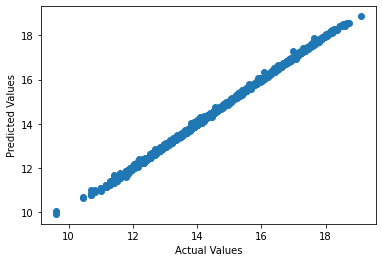

In [31]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [32]:
train_r2_score = r2_score(y_train, y_pred_train)
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)

print('Train r2 Score:', train_r2_score)
print('Train RMSE:', train_rmse)

Train r2 Score: 0.9997339211458287
Train RMSE: 0.019545700492441333


In [33]:
y_pred_test = rfr.predict(x_test)
y_pred_test

array([13.11598833, 13.43208465, 14.5814794 , ..., 12.76198303,
       12.80339955, 13.23715267])

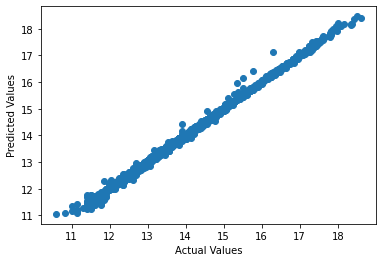

In [34]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:
test_r2_score = r2_score(y_test, y_pred_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print('Test r2 Score:', test_r2_score)
print('Test RMSE:', test_rmse)

Test r2 Score: 0.9979666036684937
Test RMSE: 0.05402394689553071


In [36]:
train_cross_val_r2_scores = cross_val_score(rfr, x_train, y_train, scoring='r2', cv=10)
train_cross_val_r2_score = np.mean(train_cross_val_r2_scores)

train_cross_val_rmse_scores = cross_val_score(rfr, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
train_cross_val_rmse_score = -np.mean(train_cross_val_rmse_scores)


test_cross_val_r2_scores = cross_val_score(rfr, x_test, y_test, scoring='r2', cv=10)
test_cross_val_r2_score = np.mean(test_cross_val_r2_scores)

test_cross_val_rmse_scores = cross_val_score(rfr, x_test, y_test, scoring='neg_mean_squared_error', cv=10)
test_cross_val_rmse_score = -np.mean(test_cross_val_rmse_scores)


print("Train Cross-Validated R2 Score:", train_cross_val_r2_score)
print("Test Cross-Validated R2 Score:", test_cross_val_r2_score)

print("Train Cross-Validated RMSE:", train_cross_val_rmse_score)
print("Test Cross-Validated RMSE:", test_cross_val_rmse_score)

Train Cross-Validated R2 Score: 0.9979539911559501
Test Cross-Validated R2 Score: 0.9942310985412763
Train Cross-Validated RMSE: 0.0029304755738505895
Test Cross-Validated RMSE: 0.008319690749451419
